In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy

In [2]:
df = pd.read_csv("roots.csv")
df.root = df.root.str.replace("أ", "ء")

In [3]:
df["root1"] = df["root"].str[0]
df["root2"] = df["root"].str[2]
df["root3"] = df["root"].str[4]

In [4]:
def features(letter):
    # place, manner, voice, emphatic
    return {
        "ي": ("palatal", "approximant", True, False),
        "و": ("labial", "approximant", True, False),
        "ه": ("glottal", "fricative", False, False),
        "ن": ("alveolar", "nasal", True, False),
        "م": ("labial", "nasal", True, False),
        "ل": ("alveolar","approximant", True, False),
        "ك": ("velar", "plosive", False, False),
        "ق": ("uvular", "plosive", False, False),
        "ف": ("labial", "fricative", False, False),
        "غ": ("uvular", "fricative", True, False),
        "ع": ("pharyngeal", "fricative", True, False),
        "ظ": ("dental", "fricative", True, True),
        "ط": ("alveolar", "plosive", False, True),
        "ض": ("alveolar", "plosive", True, True),
        "ص": ("alveolar", "fricative", False, True),
        "ش": ("postalveolar", "fricative", False, False),
        "س": ("alveolar", "fricative", False, False),
        "ز": ("alveolar", "fricative", True, False),
        "ر": ("alveolar", "trill", True, False),
        "ذ": ("dental", "fricative", True, False),
        "د": ("alveolar", "plosive", True, False),
        "خ": ("uvular", "fricative", False, False),
        "ح": ("pharyngeal", "fricative", False, False),
        "ج": ("postalveolar", "affricate", True, False),
        "ث": ("dental", "fricative", False, False),
        "ت": ("alveolar", "plosive", False, False),
        "ب": ("labial", "plosive", True, False),
        "ء": ("glottal", "plosive", False, False)
    }[letter]

In [5]:
df[df.root1 == df.root2]

,root,subcategories,entries,link,root1,root2,root3
603,د د ن,0,1,https://en.m.wiktionary.org/wiki/Category:Arab...,د,د,ن
1061,ش ش ن,0,1,https://en.m.wiktionary.org/wiki/Category:Arab...,ش,ش,ن


In [6]:
df[df.root1 == df.root3]

,root,subcategories,entries,link,root1,root2,root3
80,ء ي ء,0,1,https://en.m.wiktionary.org/wiki/Category:Arab...,ء,ي,ء
202,ت ح ت,0,2,https://en.m.wiktionary.org/wiki/Category:Arab...,ت,ح,ت
238,ث ل ث,0,12,https://en.m.wiktionary.org/wiki/Category:Arab...,ث,ل,ث
923,س د س,0,6,https://en.m.wiktionary.org/wiki/Category:Arab...,س,د,س
968,س ل س,0,2,https://en.m.wiktionary.org/wiki/Category:Arab...,س,ل,س
1002,س و س,0,3,https://en.m.wiktionary.org/wiki/Category:Arab...,س,و,س
1011,س ي س,0,2,https://en.m.wiktionary.org/wiki/Category:Arab...,س,ي,س
1117,ش و ش,0,2,https://en.m.wiktionary.org/wiki/Category:Arab...,ش,و,ش
1282,ط ر ط,0,1,https://en.m.wiktionary.org/wiki/Category:Arab...,ط,ر,ط
1665,ف و ف,0,2,https://en.m.wiktionary.org/wiki/Category:Arab...,ف,و,ف


In [7]:
df[df.root2 == df.root3]

,root,subcategories,entries,link,root1,root2,root3
0,ء ب ب,0,1,https://en.m.wiktionary.org/wiki/Category:Arab...,ء,ب,ب
16,ء ث ث,0,2,https://en.m.wiktionary.org/wiki/Category:Arab...,ء,ث,ث
40,ء س س,0,5,https://en.m.wiktionary.org/wiki/Category:Arab...,ء,س,س
57,ء ل ل,0,1,https://en.m.wiktionary.org/wiki/Category:Arab...,ء,ل,ل
64,ء م م,0,6,https://en.m.wiktionary.org/wiki/Category:Arab...,ء,م,م
...,...,...,...,...,...,...,...
2480,ه ز ز,0,4,https://en.m.wiktionary.org/wiki/Category:Arab...,ه,ز,ز
2484,ه س س,0,1,https://en.m.wiktionary.org/wiki/Category:Arab...,ه,س,س
2494,ه ل ل,0,3,https://en.m.wiktionary.org/wiki/Category:Arab...,ه,ل,ل
2503,ه م م,0,10,https://en.m.wiktionary.org/wiki/Category:Arab...,ه,م,م


In [8]:
df.sort_values(by="entries", ascending=False)

,root,subcategories,entries,link,root1,root2,root3
247,ث ن ي,0,32,https://en.m.wiktionary.org/wiki/Category:Arab...,ث,ن,ي
319,ج م ع,0,29,https://en.m.wiktionary.org/wiki/Category:Arab...,ج,م,ع
1401,ع ش ر,0,28,https://en.m.wiktionary.org/wiki/Category:Arab...,ع,ش,ر
2324,و ح د,0,22,https://en.m.wiktionary.org/wiki/Category:Arab...,و,ح,د
2541,و ح د,0,22,https://en.m.wiktionary.org/wiki/Category:Arab...,و,ح,د
...,...,...,...,...,...,...,...
1355,ع ت ي,0,1,https://en.m.wiktionary.org/wiki/Category:Arab...,ع,ت,ي
1354,ع ت ن,0,1,https://en.m.wiktionary.org/wiki/Category:Arab...,ع,ت,ن
1346,ع ب ل,0,1,https://en.m.wiktionary.org/wiki/Category:Arab...,ع,ب,ل
1345,ع ب ق,0,1,https://en.m.wiktionary.org/wiki/Category:Arab...,ع,ب,ق


<AxesSubplot:xlabel='root2', ylabel='root1'>

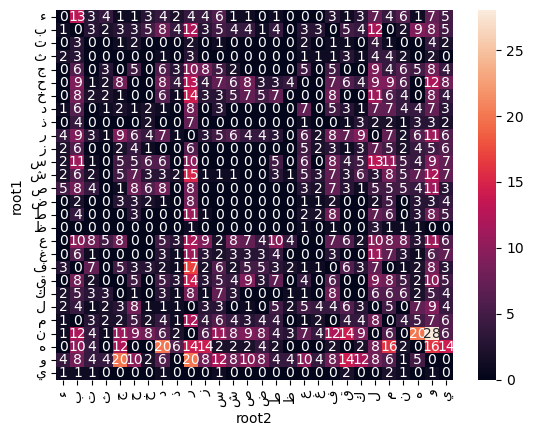

In [9]:
sns.heatmap(pd.crosstab(df.root1, df.root2), annot=True, xticklabels=True, yticklabels=True)

<AxesSubplot:xlabel='root3', ylabel='root1'>

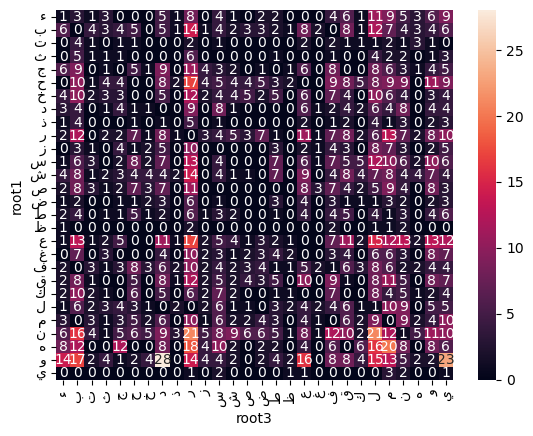

In [10]:
sns.heatmap(pd.crosstab(df.root1, df.root3), annot=True, xticklabels=True, yticklabels=True)

<AxesSubplot:xlabel='root3', ylabel='root2'>

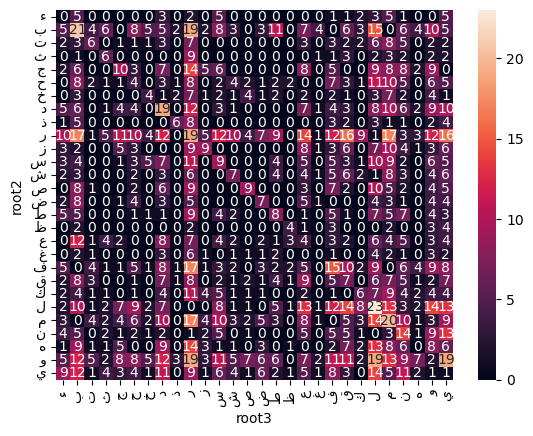

In [11]:
sns.heatmap(pd.crosstab(df.root2, df.root3), annot=True, xticklabels=True, yticklabels=True)

In [12]:
chi2_p = lambda contingency: scipy.stats.chi2_contingency(contingency)[1]
SIGNIFICANCE=0.01

effects = np.ndarray((3,3))
positions = ["root1", "root2", "root3"]
for i, position_i in enumerate(positions):
    for j, position_j in enumerate(positions):
        contingency = pd.crosstab(
            df[position_i].apply(lambda l: features(l)[1]),
            df[position_j].apply(lambda l: features(l)[1])
        )
        if chi2_p(contingency) < SIGNIFICANCE:      
            effects[i, j] = scipy.stats.contingency.association(contingency) 
        else:
            effects[i, j] = np.nan

In [13]:
cross_quarter_effects = pd.DataFrame(effects).rename(index=lambda x: positions[x], 
                                                             columns=lambda x: positions[x])
cross_quarter_effects.style.background_gradient(axis=None, cmap="YlOrRd")


,root1,root2,root3
root1,1.000000,0.115331,0.070665
root2,0.115331,1.000000,0.095080
root3,0.070665,0.095080,1.000000


In [41]:
def list_to_possibilities(values):
    result = dict()
    for value in set(values):
        result[value] = len([v for v in values if v == value])
    return result

In [46]:
for x, y in pd.crosstab(df.root1, df.root2):
    print(x, y)

ValueError: not enough values to unpack (expected 2, got 1)

In [53]:
print("""digraph G
{
    rank=same
    rankdir=LR
    
    subgraph 0 {0}
""")
print("subgraph 1 {" + "\n".join((f"{r}1 [label={r}]" for r in set(df.root1))) + "}")
print("subgraph 2 {" + "\n".join((f"{r}2 [label={r}]" for r in set(df.root2))) + "}")
print("subgraph 3 {" + "\n".join((f"{r}3 [label={r}]" for r in set(df.root3))) + "}")
for letter1, count1 in list_to_possibilities(df.root1).items():
    print(f"0 -> {letter1}1 [label={count1}]")
for letter1 in set(df.root1):
    for letter2, count2 in list_to_possibilities(df[df.root1 == letter1].root2).items():
        print(f"{letter1}1 -> {letter2}2 [label={count2}]")
for letter2 in set(df.root2):
    for letter3, count3 in list_to_possibilities(df[df.root2 == letter2].root3).items():
        print(f"{letter2}2 -> {letter3}3 [label={count3}]")
print("}")

digraph G
{
    rank=same
    rankdir=LR
    
    subgraph 0 {0}

subgraph 1 {ر1 [label=ر]
ش1 [label=ش]
ف1 [label=ف]
ء1 [label=ء]
ط1 [label=ط]
ت1 [label=ت]
ن1 [label=ن]
ك1 [label=ك]
ض1 [label=ض]
ع1 [label=ع]
ص1 [label=ص]
ي1 [label=ي]
ب1 [label=ب]
ذ1 [label=ذ]
س1 [label=س]
ظ1 [label=ظ]
ز1 [label=ز]
غ1 [label=غ]
ق1 [label=ق]
خ1 [label=خ]
ج1 [label=ج]
ث1 [label=ث]
ل1 [label=ل]
م1 [label=م]
د1 [label=د]
ح1 [label=ح]
و1 [label=و]
ه1 [label=ه]}
subgraph 2 {ر2 [label=ر]
ش2 [label=ش]
ف2 [label=ف]
ء2 [label=ء]
ط2 [label=ط]
ت2 [label=ت]
ن2 [label=ن]
ك2 [label=ك]
ض2 [label=ض]
ع2 [label=ع]
ص2 [label=ص]
ي2 [label=ي]
ب2 [label=ب]
ذ2 [label=ذ]
س2 [label=س]
ظ2 [label=ظ]
ز2 [label=ز]
غ2 [label=غ]
ق2 [label=ق]
خ2 [label=خ]
ج2 [label=ج]
ث2 [label=ث]
ل2 [label=ل]
م2 [label=م]
د2 [label=د]
ح2 [label=ح]
و2 [label=و]
ه2 [label=ه]}
subgraph 3 {ر3 [label=ر]
ش3 [label=ش]
ف3 [label=ف]
ء3 [label=ء]
ط3 [label=ط]
ت3 [label=ت]
ن3 [label=ن]
ك3 [label=ك]
ض3 [label=ض]
ع3 [label=ع]
ص3 [label=ص]
ي3 [label=ي]
ب3 [label=ب]